In [19]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis

from sklearn.decomposition import PCA
import pyLDAvis
from gensim.models import LdaModel

# Load 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups_data.data

# Preprocess text
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Apply preprocessing to all documents
processed_docs = [preprocess(doc) for doc in documents]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Apply LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics discovered
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")

# Visualize topics
lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1: 0.047*"q" + 0.046*"max" + 0.045*"p" + 0.042*"r" + 0.041*"g" + 0.034*"n" + 0.029*"c" + 0.029*"w" + 0.029*"b" + 0.025*"e"
Topic 2: 0.040*"x" + 0.017*"space" + 0.008*"earth" + 0.008*"launch" + 0.007*"orbit" + 0.007*"satellite" + 0.007*"mission" + 0.006*"moon" + 0.005*"planet" + 0.005*"solar"
Topic 3: 0.018*"file" + 0.013*"window" + 0.013*"image" + 0.010*"program" + 0.008*"use" + 0.007*"version" + 0.006*"x" + 0.006*"software" + 0.006*"get" + 0.005*"available"
Topic 4: 0.011*"armenian" + 0.008*"jew" + 0.007*"israel" + 0.006*"state" + 0.005*"war" + 0.005*"wa" + 0.005*"drug" + 0.005*"muslim" + 0.005*"turkish" + 0.005*"israeli"
Topic 5: 0.022*"myers" + 0.015*"ra" + 0.011*"ed" + 0.007*"ink" + 0.007*"istanbul" + 0.007*"turkey" + 0.006*"sea" + 0.005*"university" + 0.005*"dpy" + 0.004*"pixmap"
Topic 6: 0.011*"key" + 0.008*"information" + 0.008*"system" + 0.006*"new" + 0.006*"university" + 0.006*"use" + 0.006*"data" + 0.005*"program" + 0.005*"public" + 0.005*"computer"
Topic 7: 0.021*"game

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


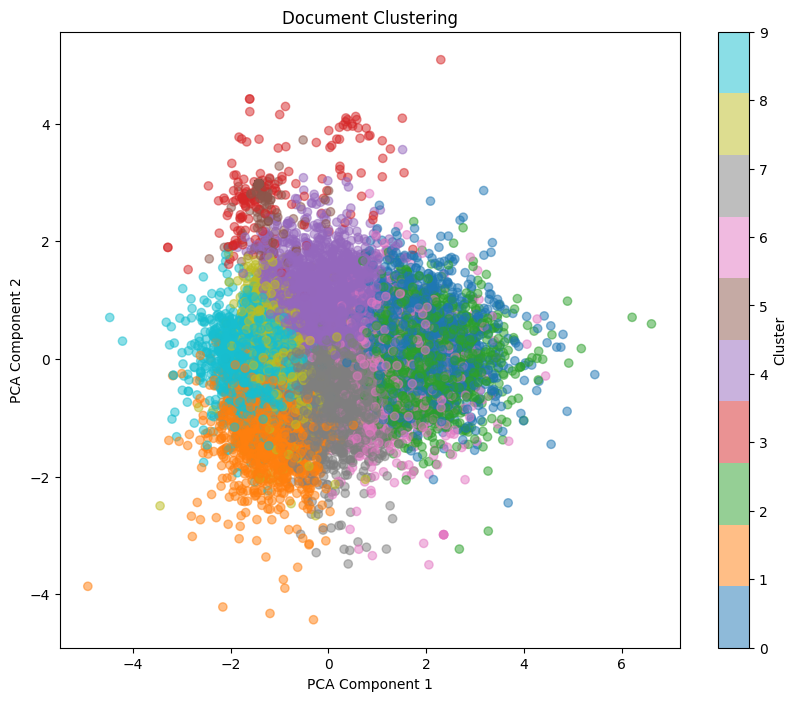

In [20]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=processed_docs, vector_size=100, window=5, min_count=1, workers=4)

def get_average_embedding(tokens):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

doc_embeddings = [get_average_embedding(doc) for doc in processed_docs]

# Calculate cosine similarity
similarity_matrix = cosine_similarity(doc_embeddings)

# Perform clustering
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
clusters = kmeans.fit_predict(doc_embeddings)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(doc_embeddings)

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='tab10', alpha=0.5)
plt.title('Document Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()